In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

### Loading in datasets

In [2]:
usage_by_state = pd.read_csv('CSV/usage_by_state.csv')
usage_by_state.set_index('state',inplace=True)

worker_impact = pd.read_csv('CSV/worker_impact.csv')
worker_impact.set_index('tech_usage_worker_impact', inplace=True)

revenues_disclosed = pd.read_csv('CSV/revenues_disclosed.csv')
revenues_hidden = pd.read_csv('CSV/revenues_hidden.csv')
revenue_state = pd.read_csv('CSV/revenue_states.csv')
revenue_industry = pd.read_csv('CSV/revenue_industry.csv')

Looking at technology usage by state

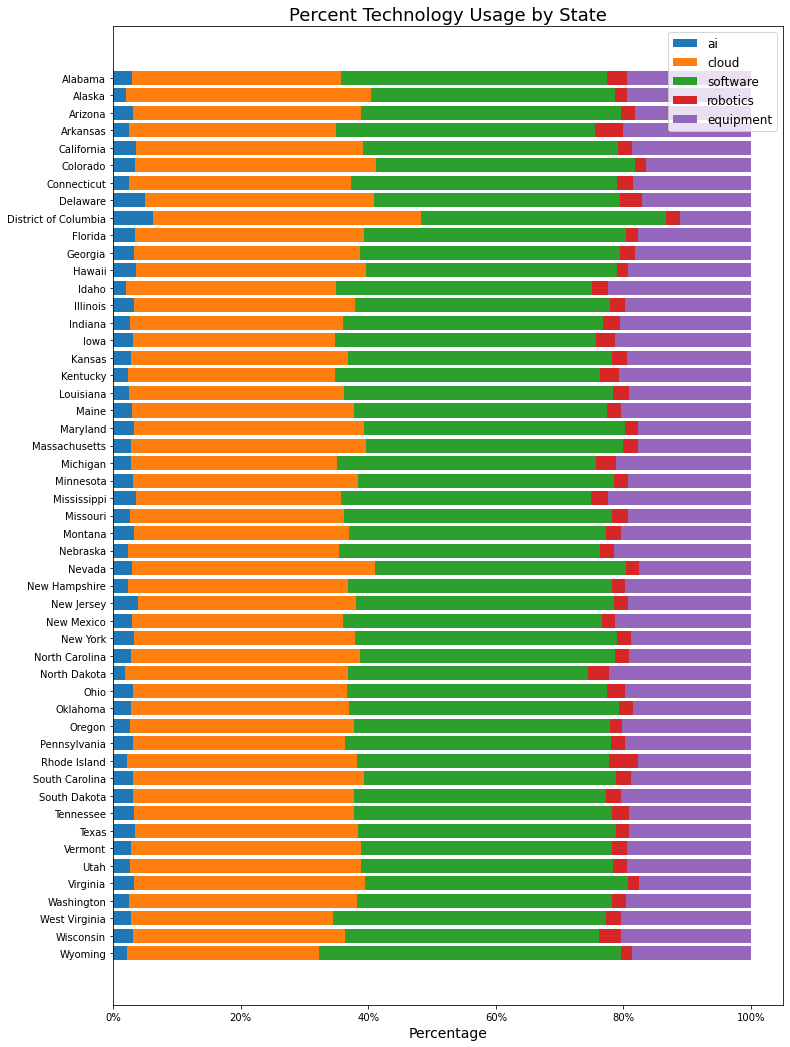

In [142]:
plt.rcParams['figure.figsize'] = [12,18]

usage_100 = usage_by_state.div(usage_by_state.sum(axis=1), axis=0)

bottom = []

for i in usage_100.columns:
    b = list(usage_100.loc[:, usage_100.columns[0]: i].sum(axis=1))
    bottom.append(b)

fig, ax = plt.subplots()

for i, j in enumerate(usage_100.columns):
    if i == 0:
        plt.barh(usage_100.index, usage_100[j])
    else:
        plt.barh(usage_100.index, usage_100[j], left= bottom[i-1])

#formatting
ax.set_xticklabels(['{:.0%}'.format(x) for x in ax.get_xticks()])
ax.invert_yaxis()
ax.set_xlabel('Percentage', fontsize=14)
plt.legend(labels=usage_100.columns, fontsize='large')
plt.title('Percent Technology Usage by State', fontsize=18)
plt.show();


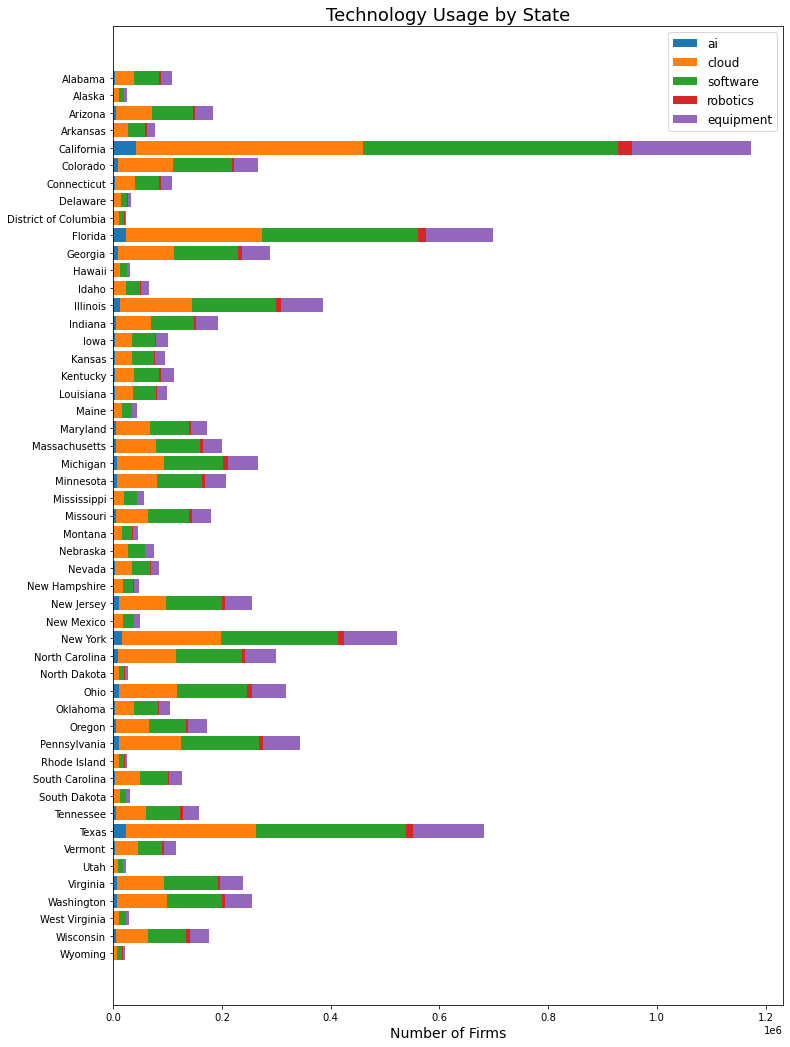

In [146]:
plt.rcParams['figure.figsize'] = [12,18]
bottom = []

for i in usage_by_state.columns:
    b = list(usage_by_state.loc[:, usage_by_state.columns[0]: i].sum(axis=1))
    bottom.append(b)

fig, ax = plt.subplots()

for i, j in enumerate(usage_by_state.columns):
    if i == 0:
        plt.barh(usage_by_state.index, usage_by_state[j])
    else:
        plt.barh(usage_by_state.index, usage_by_state[j], left= bottom[i-1])

#formatting
ax.invert_yaxis()
ax.set_xlabel('Number of Firms', fontsize=14)
plt.legend(labels=usage_by_state.columns, fontsize='large')
plt.title('Technology Usage by State', fontsize=18)
plt.show();

<Figure size 1440x2160 with 0 Axes>

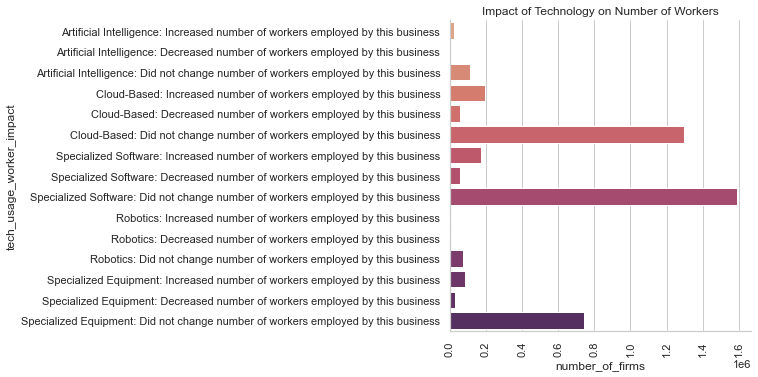

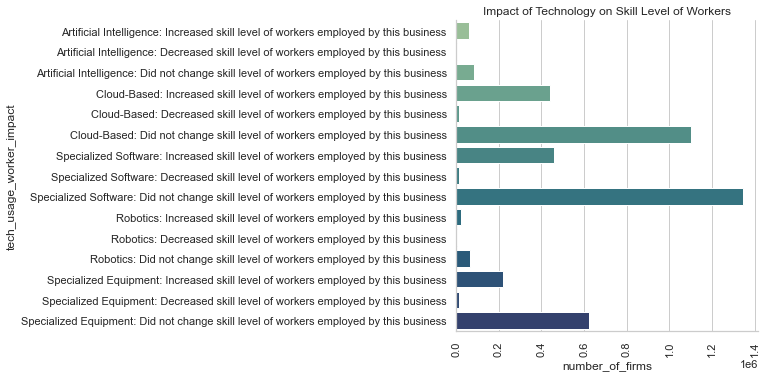

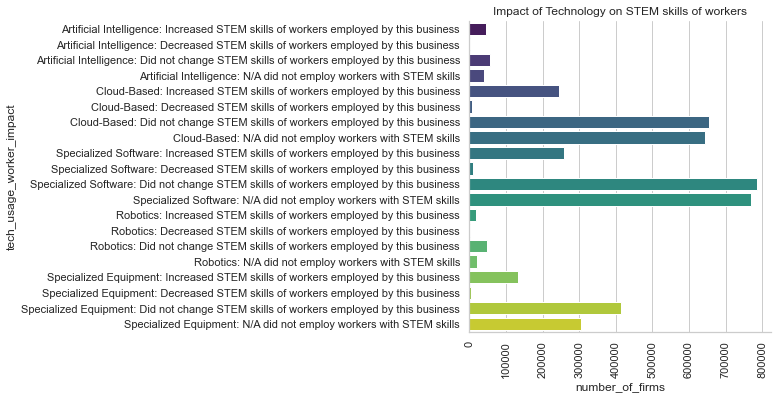

In [55]:
all_industries = worker_impact[worker_impact['naics2017'] == '00']
all_industries = all_industries[[
    'impactwf_u', 'number_of_firms', 'number_of_employees', 'annual_payroll'
    ]]

numb_workers = all_industries[all_industries.index.str.contains('number of workers')]
skill = all_industries[all_industries.index.str.contains('skill level')]
stem = all_industries[all_industries.index.str.contains('STEM')]

plt.figure(figsize = (20,30))

sns.catplot(
    y = numb_workers.index,
    x = 'number_of_firms',
    data = numb_workers,
    kind = 'bar',
    palette = 'flare'
    );
plt.title('Impact of Technology on Number of Workers')
plt.xticks(rotation=90);

sns.catplot(
    y = skill.index,
    x = 'number_of_firms',
    data = skill,
    kind = 'bar',
    palette = 'crest'
    );

plt.xticks(rotation=90);
plt.title('Impact of Technology on Skill Level of Workers')

sns.catplot(
    y = stem.index,
    x = 'number_of_firms',
    data = stem,
    kind = 'bar',
    palette = 'viridis'
    );

plt.xticks(rotation=90);
plt.title('Impact of Technology on STEM skills of workers');
plt.show()

### Revenue
#### Topics:
 1. Revenue by Race
 2. Revenue by State and Race
 3. Companies that Chose Not to Disclose Revenues
 4. Revenue by Industry and Race

### Revenue by Race
For this visualization, I was interested to see what revenues look for companies based on the race of their owner(s). I had a strong feeling that businesses with white owners would have higher revenues than businesses owned by people of color due to racial inequities faced by people of color in every industry. The data supports my initial hypothesis, but the extremely large difference between the revenues of companies owned by white people and companies owned by people of color was shocking.

Companies owned by white people have much, much larger revenues than companies owned by people of color. No other race comes even close to generating the same amount of revenues. The difference is particularly startling between companies owned by Native Hawaiians/Pacific Islanders and companies with white owners. Companies owned by Native Hawaiians/Pacific Islanders have not crossed the 13 billion reported in revenue.

I did consider removing the revenues of companies with white owners from this visualization since it is such a large outlier, but ultimately, this chart illustrates that business owners of color continue to face discomfortingly large disparites.

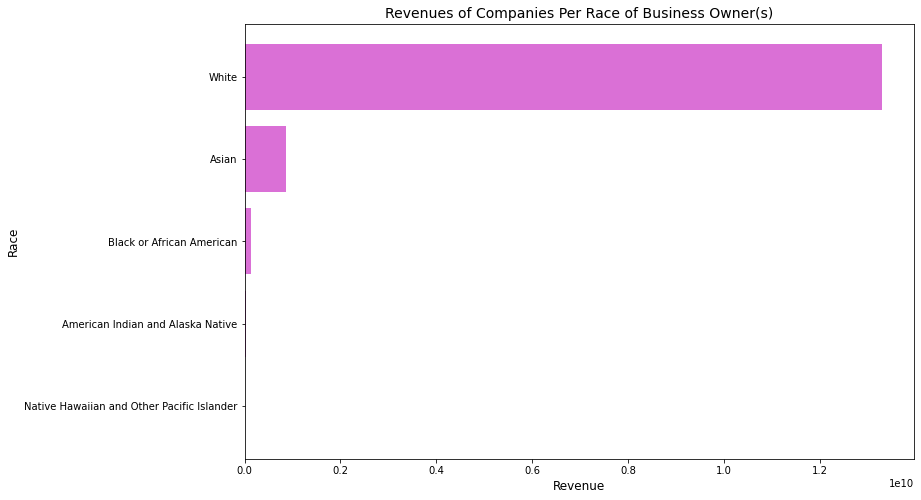

In [3]:
revenues_disclosed = revenues_disclosed.sort_values('revenue')

plt.figure(figsize= (12,8))

plt.barh(
    y=revenues_disclosed['race'], 
    width=revenues_disclosed['revenue'], 
    color = 'orchid'
    )

plt.title('Revenues of Companies Per Race of Business Owner(s)', size = 14)
plt.xlabel('Revenue', size = 12)
plt.ylabel('Race', size = 12);

In [48]:
# ranges_by_race = pd.DataFrame()
# ranges_by_race['state'] = revenue_state['name'].sort_values().unique()

# asian = revenue_state[revenue_state['race'].str.contains('Asian')]
# asian = asian.groupby('name')['revenue_ranges'].median()
# asian = list(asian)

# ranges_by_race['asian'] = asian
# ranges_by_race

,state,asian
0,Alabama,8.0
1,Alaska,6.0
2,Arizona,7.0
3,Arkansas,7.0
4,California,9.0
...,...,...
46,Virginia,8.0
47,Washington,8.0
48,West Virginia,7.0
49,Wisconsin,7.0


#### Revenue by State and Race
I was curious to see if certain states had larger disparities in revenues between companies owned by white people and companies owned by people of color. In every state, white-owned companies overwhelmingly had the greatest revenues. In some states like California, New York, and Massachussets, the disparities in revenues were less. Specifically, Asian-owned companies were more likely to generate revenues close to revenues generated by white-owned companies.

Other states like Iowa, Maine, and Wyoming still had vast gaps in terms of revenue based on the race of the owner(s). Not every state had large enough populations of all races to provide data for each race. For example, Vermont only had data for white-owned companies and Asian-owned companies.

I did attempt to drill down further, so we could look at the revenue breakdown by race for the ten states with the highest reported revenues and the ten states with the lowest reported revenues. However, this was difficult to do since I am working with revenue ranges instead of exact revenues.

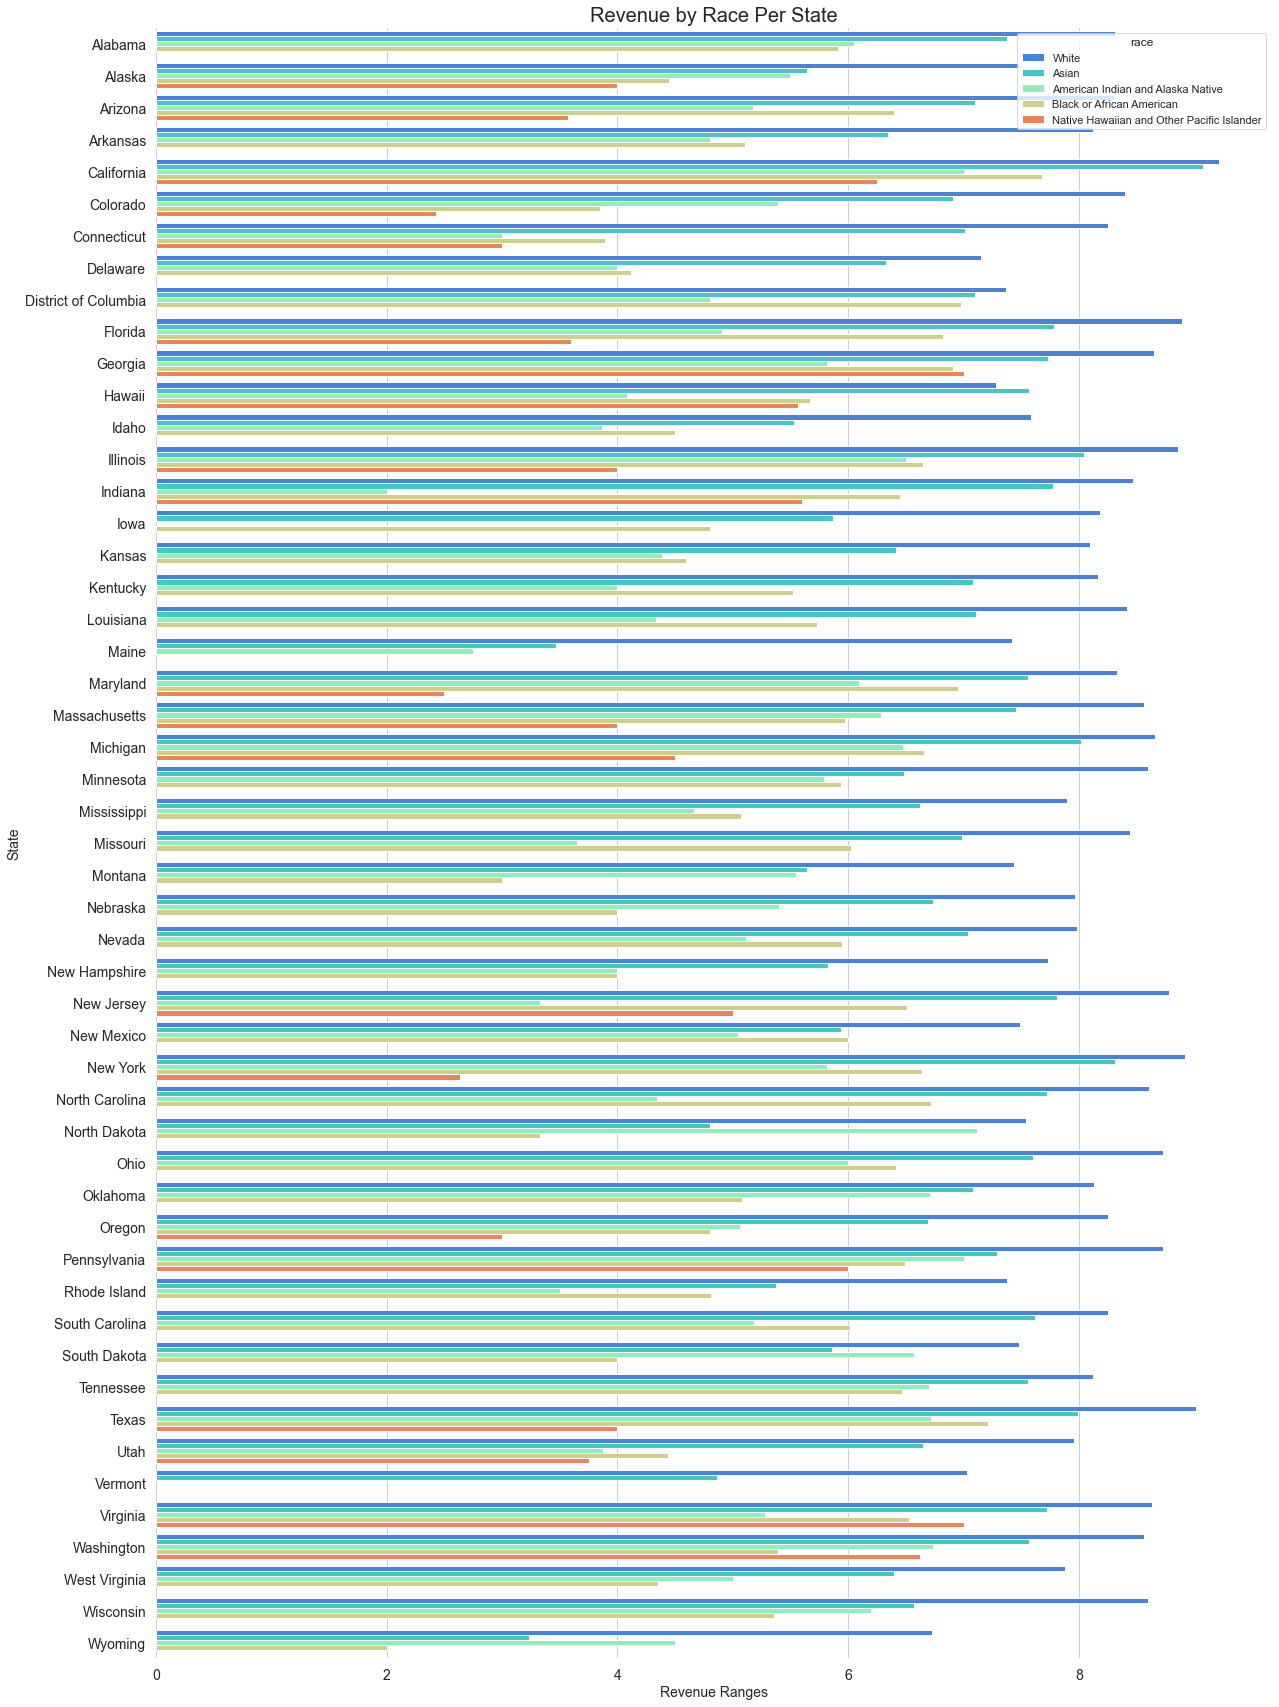

In [4]:
revenue_state['revenue_ranges'] = revenue_state['revenue_ranges'].replace(['B', 'I', 'K', 'L', 'M', 'O', 'R', 'T', 'U', 'W'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
revenue_state = revenue_state.sort_values('name')

sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,30))
ax = sns.barplot(
    x='revenue_ranges', 
    y='name',
    data=revenue_state, 
    palette='rainbow', 
    hue='race',
    ci=None
    )

ax.set_title('Revenue by Race Per State', size=20)
ax.set_xlabel('Revenue Ranges', size=14)
ax.set_ylabel('State', size=14)
sns.despine(left=True, bottom=True)
plt.yticks(size = 14)
plt.xticks(size = 14);

#### Companies that Chose Not to Disclose Revenues
During initial data analysis, we discovered that not every company had disclosed their exact revenue generated. Instead, some companies had opted to disclose a range that their company revenues fell within. These ranges are:

1. Less than $1 million
2. $1 million to less than $5 million
3. $5 million to less than $15 million
4. $15 million to less than $50 million
5. $50 million to less than $75 million
6. $75 million to less than $150 million
7. $150 million to less than $500 million
8. $500 million to less than $1 billion
9. $1 billion to less than $5 billion
10. $5 billion or more

Upon discovering this, I speculated that companies with higher revenues would be less likely to disclose their revenues. I created a basic histogram, and this histogram supports my initial hypothesis. Generally, companies with higher revenues are less likely to disclose their exact revenue.

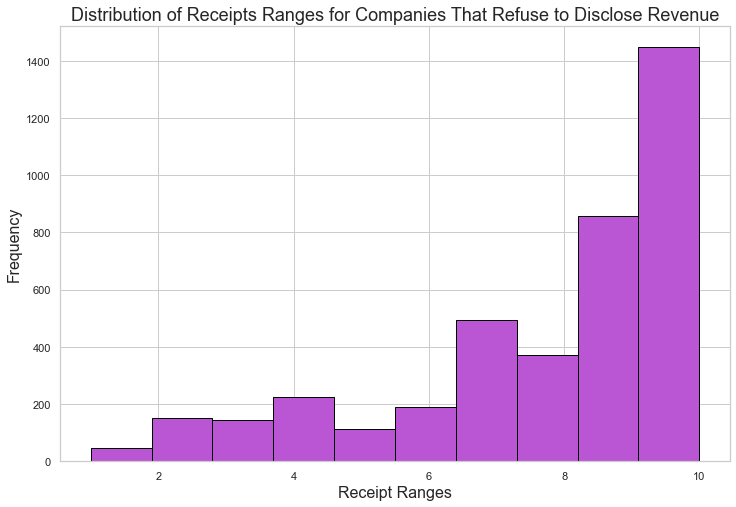

In [10]:
revenues_hidden['revenue_ranges'] = revenues_hidden['revenue_ranges'].replace(['B', 'I', 'K', 'L', 'M', 'O', 'R', 'T', 'U', 'W'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

plt.figure(figsize= (12,8))
plt.hist(
    revenues_hidden['revenue_ranges'], 
    color = 'mediumorchid', 
    bins = 10, 
    ec = 'black'
    )

plt.title('Distribution of Receipts Ranges for Companies That Refuse to Disclose Revenue', size=18)
plt.xlabel('Receipt Ranges', size=16)
plt.ylabel('Frequency', size=16);

#### Revenue by Industry and Race
I was curious if there are certain industries in which businesses owned by people of color may have less disparities in their reported revenues. Once again, white-owned companies generate much higher revenues than businesses owned by people of color in every industry.

There are some industries where the differences are much less overwhelming and point to progress. Businesses owned by people of color are thriving and actually competing against white-owned businesses in Finance and insurance, and Professional/Scientific/Technical Services. Other industries like Agriculture/Forestry/Fishing/Hunting still have much catching up to do, with white-owned businesses generating significantly more revenues than businesses owned by other races.

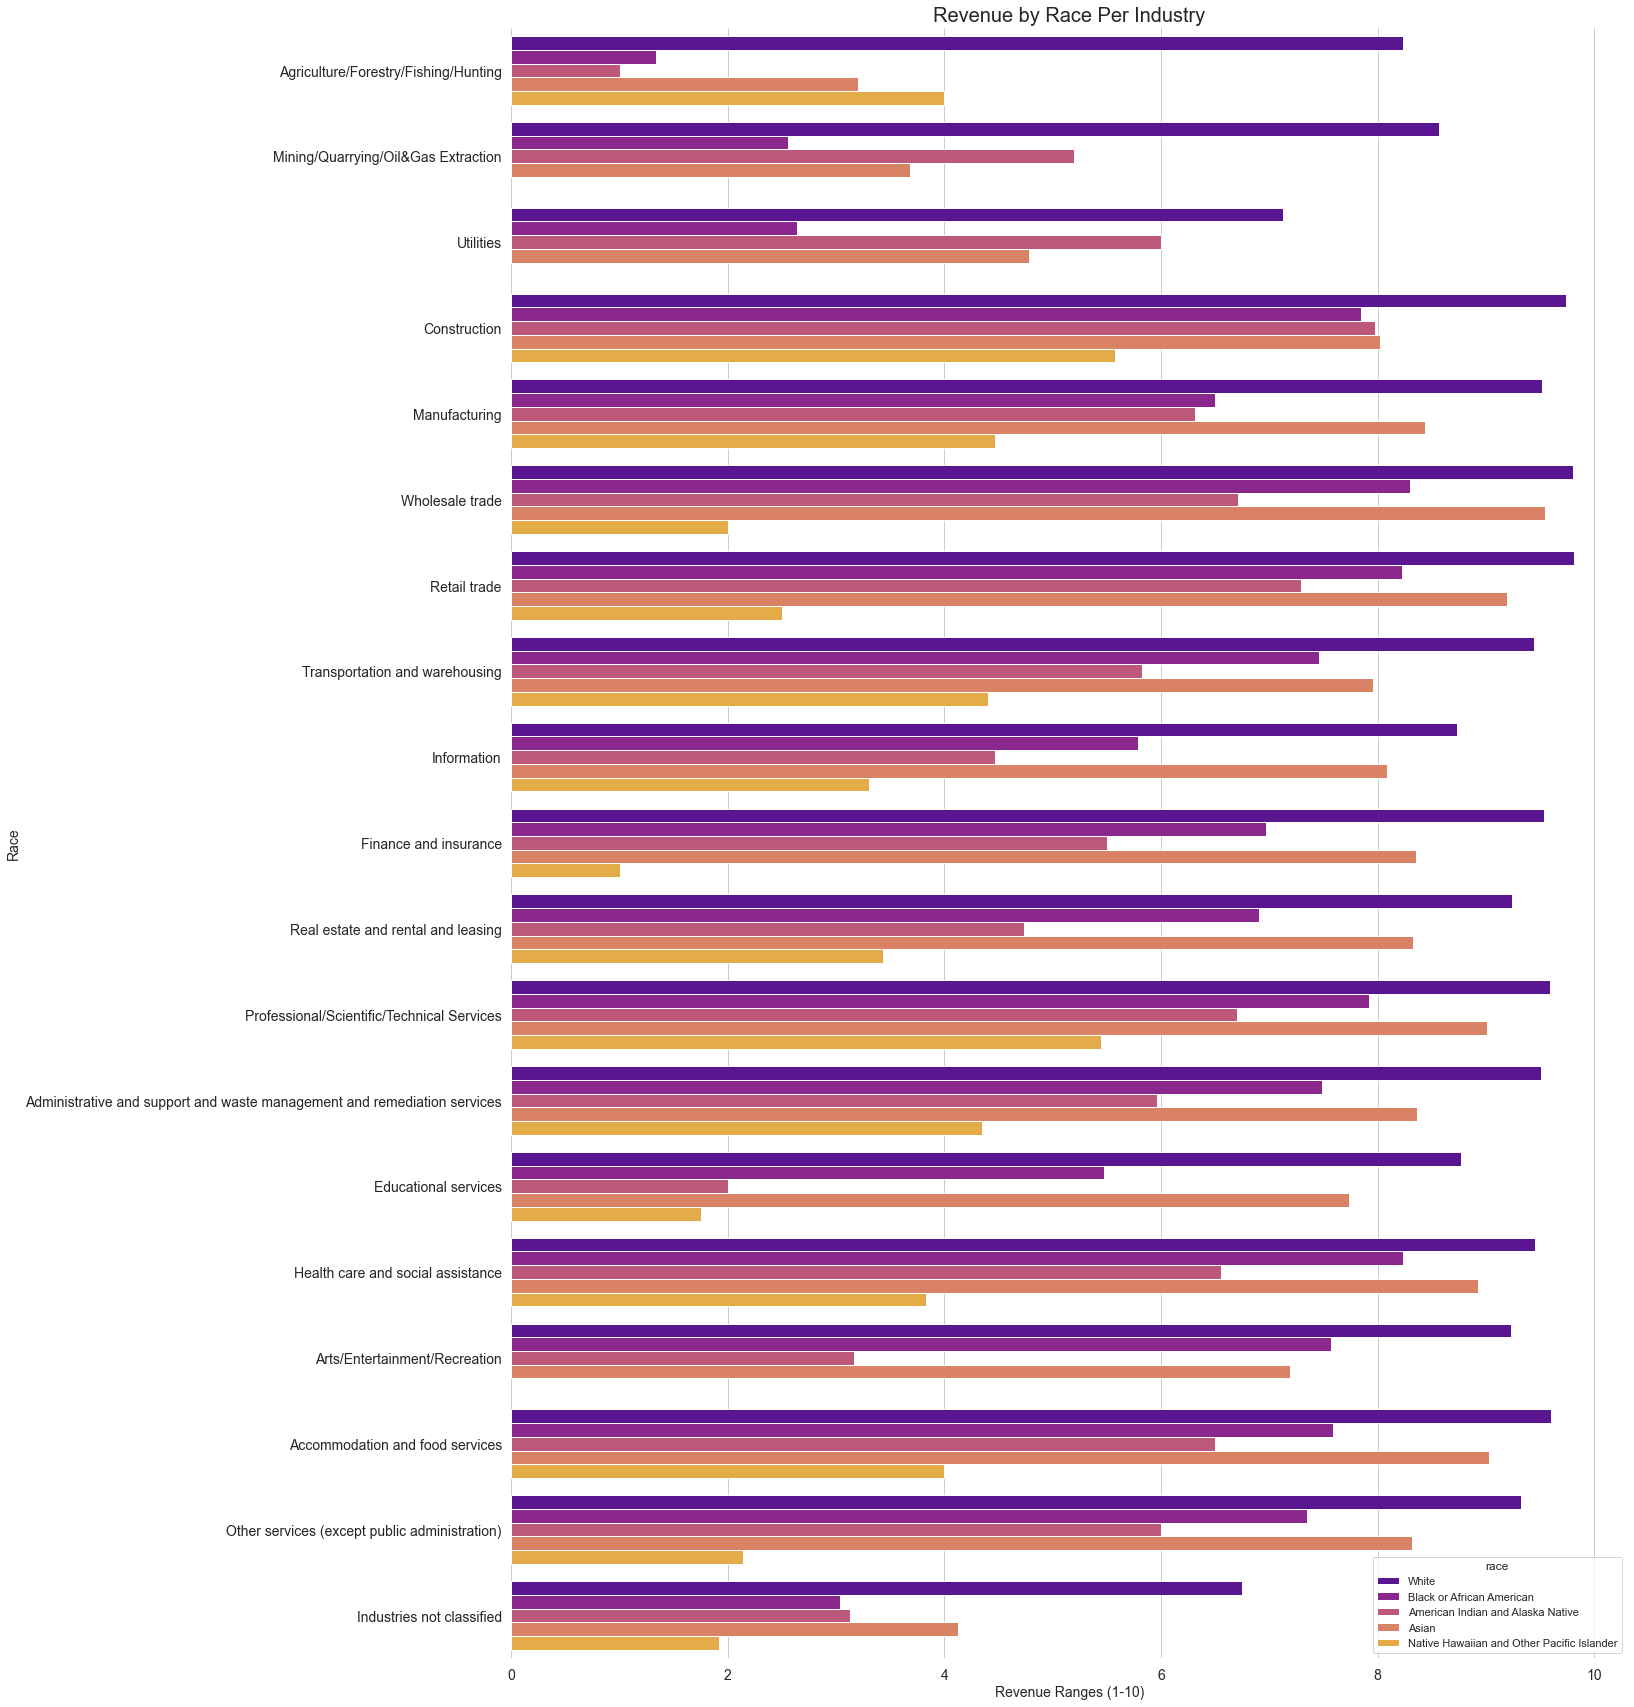

In [5]:
revenue_industry['revenue_ranges'] = revenue_industry['revenue_ranges'].replace(['B', 'I', 'K', 'L', 'M', 'O', 'R', 'T', 'U', 'W'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,30))
ax = sns.barplot(
    x='revenue_ranges', 
    y='industry', 
    data=revenue_industry, 
    palette='plasma', 
    hue='race',
    ci=None
    )

ax.set_title('Revenue by Race Per Industry', size=20)
ax.set_xlabel('Revenue Ranges (1-10)', size=14)
ax.set_ylabel('Race', size=14)
sns.despine(left=True, bottom=True)
plt.yticks(size = 14)
plt.xticks(size = 14);